In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\OMEN CI7\Documents\repository\Neurociencias-2025-2\S03_datasets\iris\iris.csv"

df = pd.read_csv(path)

In [3]:
df.describe(include='all')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [6]:
# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
tree_iris = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree_iris.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20,
                       random_state=99)

In [24]:
observed = tree_iris.predict(X_test)

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score

In [10]:
pd.crosstab(y_test, observed, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,19,0,0
versicolor,0,12,1
virginica,0,0,13


Text(0.5, 1.0, 'Árbol de decisión')

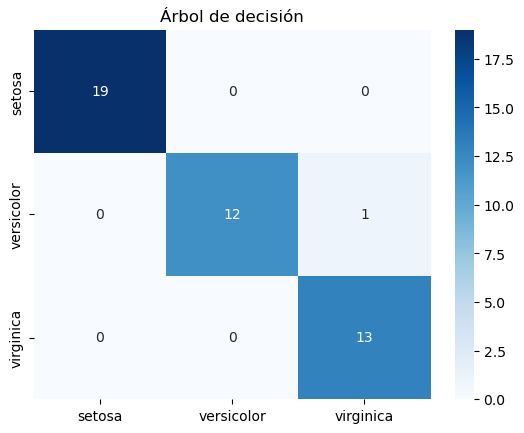

In [11]:
cm = confusion_matrix(y_test, observed, labels=df.Species.unique())

sns.heatmap(cm, annot=True, xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
            cmap="Blues").set_title("Árbol de decisión")

In [12]:
accuracy_score(y_test, observed), precision_score(y_test, observed, labels=df.Species.unique(), average='macro')

(0.9777777777777777, 0.9761904761904763)

In [13]:
print(classification_report(y_test, observed, labels=df.Species.unique()))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [14]:
from sklearn.metrics import precision_recall_fscore_support as score

precision, recall, fscore, support = score(y_test, observed)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [1.         1.         0.92857143]
recall: [1.         0.92307692 1.        ]
fscore: [1.         0.96       0.96296296]
support: [19 13 13]


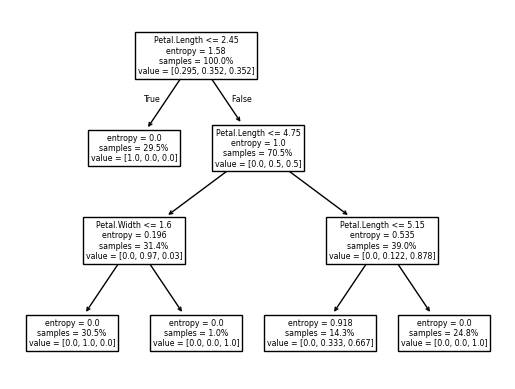

In [36]:
tree.plot_tree(tree_iris, proportion=True, feature_names=X.columns)
plt.show()

In [38]:
tree_iris.score(X_train, y_train), tree_iris.score(X_test, y_test)

(0.9523809523809523, 0.9777777777777777)

In [ ]:
tree_full = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree_full.fit(X, y)

In [40]:
y_obs_full = tree_iris.predict(X)

Text(0.5, 1.0, 'Árbol de decisión')

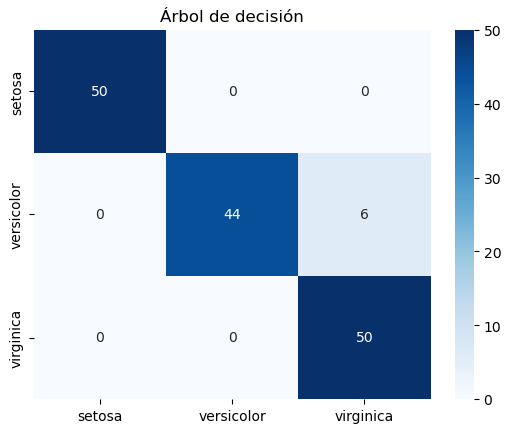

In [41]:
cm = confusion_matrix(y, y_obs_full, labels=df.Species.unique())

sns.heatmap(cm, annot=True, xticklabels=df.Species.unique(), yticklabels=df.Species.unique(), 
            cmap="Blues").set_title("Árbol de decisión")